In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
import process_data

In [38]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [39]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")

In [40]:
features = ["score_difference", "relative_strength", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

In [48]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017, 2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "final_score_difference")

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2023, 2024], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "final_score_difference")


Loading data for 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for 2015
skipping  2015
Loading data for .DS_Store
Loading data for 2017
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2017/game_400951752.csv
Loading data for 2019
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2019/game_401127963.csv
Loading data for 2021
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2021/game_401326405.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/

In [6]:

for key in training_data.keys():
    if key > 0.99:
        print("Timestep {}".format(key))
        print(training_data[key])

Timestep 0.995
[{'rows': array([-4.    ,  0.3291,  5.    ,  0.    ,  4.    , 26.    , 12.    ,
        1.    ,  0.    ,  3.    ], dtype=float32), 'label': -4.0}, {'rows': array([  0.    ,   0.5711,  24.    ,   0.    ,   1.    ,  21.    ,
         8.    , -22.    ,   0.    ,   2.    ], dtype=float32), 'label': -3.0}, {'rows': array([ 0.    ,  0.5711, 21.    ,  0.    ,  1.    , 21.    , 10.    ,
        0.    ,  0.    ,  2.    ], dtype=float32), 'label': -3.0}, {'rows': array([-1.    ,  0.5967,  5.    ,  0.    ,  1.    , 12.    , 11.    ,
       -7.    ,  0.    ,  2.    ], dtype=float32), 'label': -1.0}, {'rows': array([-8.    ,  0.5851,  3.    ,  1.    ,  2.    , 10.    ,  1.    ,
        9.    ,  1.    ,  0.    ], dtype=float32), 'label': -2.0}, {'rows': array([-8.    ,  0.5851,  3.    ,  1.    ,  1.    ,  3.    ,  1.    ,
       -7.    ,  1.    ,  0.    ], dtype=float32), 'label': -2.0}, {'rows': array([-8.    ,  0.5851,  5.    ,  1.    ,  2.    ,  1.    ,  1.    ,
       -2.    ,  1.

In [50]:
import sys
import importlib


# Remove modules from cache
modules_to_reload = [
    'kernel_methods.siamese_network',
    'kernel_methods.kernel_knn',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

# Now import fresh
import kernel_methods.kernel_knn
kernel_methods.kernel_knn.setup_models(training_data, test_data, num_models=100, epochs=50)

Training set shape: (4893, 10), Validation set shape: (1500, 10)
Training for timestep [0.0, 0.01]
Actual input dimension: 10
Using device: cpu
Created 978600 balanced pairs
Data loaded!
Created 225000 balanced pairs
Starting training on device: cpu
Model is on device: cpu
Input tensors device: x1=cpu, x2=cpu, y=cpu
Model parameters device: cpu
Epoch 1/50, Train Loss: 0.703988, Train Acc: 0.5313, Val Loss: 0.730955, Val Acc: 0.5278
Epoch 2/50, Train Loss: 0.699470, Train Acc: 0.5363, Val Loss: 0.725624, Val Acc: 0.5292
Epoch 3/50, Train Loss: 0.696891, Train Acc: 0.5397, Val Loss: 0.723604, Val Acc: 0.5269
Epoch 4/50, Train Loss: 0.695311, Train Acc: 0.5425, Val Loss: 0.725408, Val Acc: 0.5280
Epoch 5/50, Train Loss: 0.694025, Train Acc: 0.5451, Val Loss: 0.725751, Val Acc: 0.5279
Epoch 6/50, Train Loss: 0.692486, Train Acc: 0.5479, Val Loss: 0.725353, Val Acc: 0.5284
Epoch 7/50, Train Loss: 0.691388, Train Acc: 0.5497, Val Loss: 0.724692, Val Acc: 0.5263
Epoch 8/50, Train Loss: 0.6897

KeyboardInterrupt: 

In [21]:

for timestep in training_data.keys():
    print(training_data[timestep][0].apply(type))
    break

home_team_id                      <class 'numpy.float64'>
away_team_id                      <class 'numpy.float64'>
home_win                          <class 'numpy.float64'>
sequenceNumber                              <class 'int'>
homeWinProbability                        <class 'float'>
homeScore                                 <class 'float'>
scoringPlay                                <class 'bool'>
priority                                   <class 'bool'>
statYardage                               <class 'float'>
awayScore                                 <class 'float'>
wallclock                                   <class 'str'>
modified                                    <class 'str'>
id                                        <class 'float'>
text                                        <class 'str'>
period.number                             <class 'float'>
start.distance                            <class 'float'>
start.yardLine                            <class 'float'>
start.team.id 

In [56]:
# Reload import
import importlib
import process_data
importlib.reload(process_data)



test_folders = process_data.load_test_data(interpolated_dir)

Loading data for 2022
Loading data for 2024
Loading data for 2023
Loading data for .DS_Store
Loading data for 2019
Loading data for 2021
Loading data for 2020
Loading data for 2018


In [38]:
features_test_data = {key: process_data.test_feature_selection(test_data, features) for key, test_data in zip(test_folders.keys(), test_folders.values())}

In [39]:
X_tests = [features_test_data[year] for year in features_test_data]
merged = {}
for d in X_tests:
    merged.update(d)
X_tests = merged
new_X_tests = {}
print(len(X_tests))
for file in X_tests:
   timestep = 0
   for i in range(len(X_tests[file])):
        if timestep not in new_X_tests:
           new_X_tests[timestep] = [X_tests[file][i]]
        else:
            new_X_tests[timestep] += [X_tests[file][i]]
        timestep += 0.005
X_tests = new_X_tests
# len(X_tests[0.1])
X_tests.keys()

544


dict_keys([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.035, 0.04, 0.045, 0.049999999999999996, 0.05499999999999999, 0.05999999999999999, 0.06499999999999999, 0.06999999999999999, 0.075, 0.08, 0.085, 0.09000000000000001, 0.09500000000000001, 0.10000000000000002, 0.10500000000000002, 0.11000000000000003, 0.11500000000000003, 0.12000000000000004, 0.12500000000000003, 0.13000000000000003, 0.13500000000000004, 0.14000000000000004, 0.14500000000000005, 0.15000000000000005, 0.15500000000000005, 0.16000000000000006, 0.16500000000000006, 0.17000000000000007, 0.17500000000000007, 0.18000000000000008, 0.18500000000000008, 0.19000000000000009, 0.1950000000000001, 0.2000000000000001, 0.2050000000000001, 0.2100000000000001, 0.2150000000000001, 0.2200000000000001, 0.22500000000000012, 0.23000000000000012, 0.23500000000000013, 0.24000000000000013, 0.24500000000000013, 0.2500000000000001, 0.2550000000000001, 0.2600000000000001, 0.2650000000000001, 0.27000000000000013, 0.2750000000000001

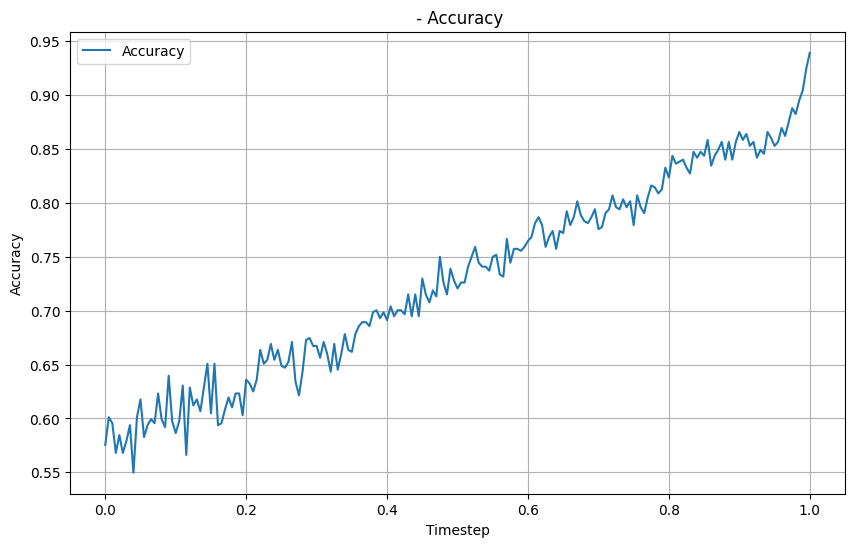

In [66]:
# Reload import
import importlib
import process_data
importlib.reload(process_data)
process_data.plot_accuracy(models, X_tests)

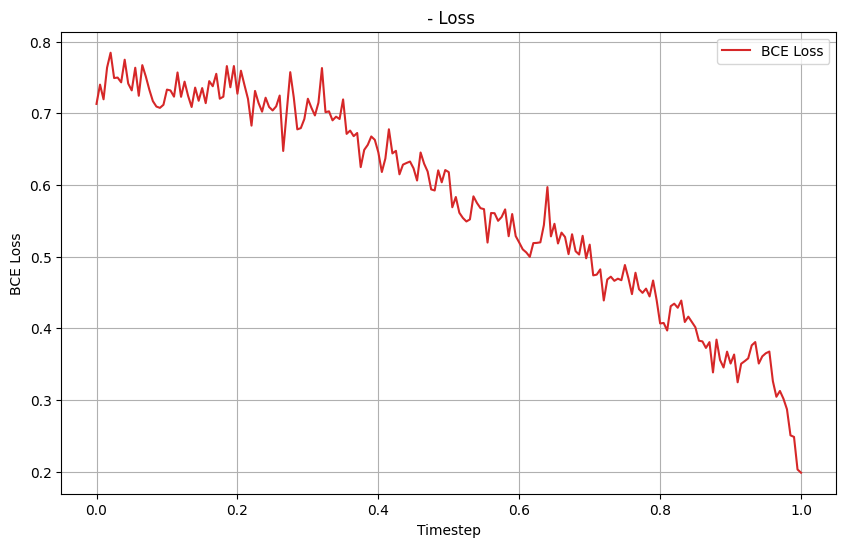

In [67]:
# Reload import
import importlib
import process_data
importlib.reload(process_data)
process_data.plot_loss(models, X_tests)

In [68]:
process_data.write_predictions(models, features_test_data, interpolated_dir, "cat_boost_phat_b")

2024
Finished writing to game_401671629.csv
Finished writing to game_401671601.csv
Finished writing to game_401671826.csv
Finished writing to game_401671832.csv
Finished writing to game_401671749.csv
Finished writing to game_401671775.csv
Finished writing to game_401671761.csv
Finished writing to game_401671760.csv
Finished writing to game_401671774.csv
Finished writing to game_401671748.csv
Finished writing to game_401671833.csv
Finished writing to game_401671827.csv
Finished writing to game_401671600.csv
Finished writing to game_401671628.csv
Finished writing to game_401671616.csv
Finished writing to game_401671831.csv
Finished writing to game_401671825.csv
Finished writing to game_401671819.csv
Finished writing to game_401671762.csv
Finished writing to game_401671776.csv
Finished writing to game_401671789.csv
Finished writing to game_401671788.csv
Finished writing to game_401671777.csv
Finished writing to game_401671763.csv
Finished writing to game_401671818.csv
Finished writing to 